<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r4-balanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-normal-n-0-3-r4.csv?token=AKVFSODCGUQEJLFDLMTI2P26ZLKWC')
print(df.shape)
df

(76013, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,84,3,2,4,1,1,5,17,23,7,0,0,1,4,3,0.75,16,6,1,6,6,36,6,4,4,4,20,85,100,1
1,85,3,2,4,2,2,5,17,23,7,0,0,1,4,3,0.75,17,5,2,6,10,60,6,8,16,16,20,85,100,1
2,86,3,2,4,3,2,5,17,23,7,0,0,1,4,3,0.75,18,4,3,6,12,72,6,12,24,24,20,85,100,1
3,87,3,2,4,4,2,5,17,23,7,0,0,1,4,3,0.75,19,3,4,6,12,72,6,16,32,32,20,85,100,1
4,91,3,2,4,5,3,5,17,23,7,0,0,1,4,3,0.75,23,2,5,6,10,60,6,20,60,60,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76008,3268883,2,0,4,1,1,5,17,20,4,3,3,20043,4,0,0.00,5,5,7,11,35,385,0,4,4,80172,20,85,100,1
76009,3268884,2,0,4,2,2,5,17,20,4,3,3,20043,4,0,0.00,6,4,8,11,32,352,0,8,16,320688,20,85,100,1
76010,3268885,2,0,4,3,2,5,17,20,4,3,3,20043,4,0,0.00,7,3,9,11,27,297,0,12,24,481032,20,85,100,1
76011,3268886,2,0,4,4,2,5,17,20,4,3,3,20043,4,0,0.00,8,2,10,11,20,220,0,16,32,641376,20,85,100,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-malicious-n-0-3-m-1-r4.csv?token=AKVFSOCTZPYFOTR3BO7VOJK6ZLKWG', nrows=80000)
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-malicious-n-0-3-m-6-r4.csv?token=AKVFSOFVBLKLVWE3GR23WQC6ZLKWK', nrows=80000)
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-malicious-n-0-3-m-9-r4.csv?token=AKVFSOHAZPFWQTJHAVZ4M3K6ZLKWM', nrows=80000)
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-malicious-n-0-3-m-14-r4.csv?token=AKVFSOCJWBJRF5YXP26YUWS6ZLKWQ', nrows=80000)

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-normal-n-0-5-r4.csv?token=AKVFSOCSMO3OEUCHJKXGL3S6ZLLTM')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-normal-n-0-10-r4.csv?token=AKVFSOFVG7PHQBTJAQ3YYTS6ZLLTQ')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-normal-n-0-12-r4.csv?token=AKVFSOEJ2RZSOXGFWDUUJEC6ZLLTU')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(80000, 30)
(80000, 30)
(80000, 30)
(80000, 30)
(78025, 30)
(74553, 30)
(82425, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,74,3,2,4,1,1,5,17,23,7,0,0,1,4,3,0.75,16,9,1,9,9,81,6,4,4,4,20,85,100,1
1,75,3,2,4,2,2,5,17,23,7,0,0,1,4,3,0.75,17,8,2,9,16,144,6,8,16,16,20,85,100,1
2,76,3,2,4,3,2,5,17,23,7,0,0,1,4,3,0.75,18,7,3,9,21,189,6,12,24,24,20,85,100,1
3,77,3,2,4,4,2,5,17,23,7,0,0,1,4,3,0.75,19,6,4,9,24,216,6,16,32,32,20,85,100,1
4,81,3,2,4,5,3,5,17,23,7,0,0,1,4,3,0.75,23,5,5,9,25,225,6,20,60,60,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631011,3272365,1,0,4,1,1,5,17,20,4,12,12,20048,2,0,0.00,5,5,8,12,40,480,0,4,4,80192,20,85,100,1
631012,3272366,1,0,4,2,2,5,17,20,4,12,12,20048,2,0,0.00,6,4,9,12,36,432,0,8,16,320768,20,85,100,1
631013,3272367,1,0,4,3,2,5,17,20,4,12,12,20048,2,0,0.00,7,3,10,12,30,360,0,12,24,481152,20,85,100,1
631014,3272368,1,0,4,4,2,5,17,20,4,12,12,20048,2,0,0.00,8,2,11,12,22,264,0,16,32,641536,20,85,100,1


In [0]:
df.shape

(631016, 30)

Test Data

In [0]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-malicious-n-0-3-m-2-r4.csv?token=AKVFSOC22BUJED46EF2DJJK6ZLLXG', nrows=30000)
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-malicious-n-0-3-m-5-r4.csv?token=AKVFSODJ5TJSVEKC4PR4UWC6ZLLXK', nrows=30000)
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-malicious-n-0-3-m-10-r4.csv?token=AKVFSOASVI4FW3G6HELXJZC6ZLLXM', nrows=30000)
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-malicious-n-0-3-m-12-r4.csv?token=AKVFSOGTU3IQQJN2HVR63F26ZLLXQ', nrows=30000)
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-malicious-n-0-3-m-13-r4.csv?token=AKVFSODJEIW33OFURAFV6XK6ZLLXU', nrows=30000)
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-malicious-n-0-3-m-15-r4.csv?token=AKVFSOC54MGSXKPTFOYWT6S6ZLLXY', nrows=30000)

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r4/2-fft-normal-n-0-10-r4.csv?token=AKVFSOD43QPO4RVFTLSYRQC6ZLL3I', nrows=30000)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df14.shape)

(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)


In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,92,1,3,1,1,4,3,9,3,3,24,8,4,5,4,0.80,20,1,1,1,1,1,3,1,4,16,3,27,9,0
1,106,3,2,4,1,1,5,17,23,7,0,0,1,4,3,0.75,16,12,1,12,12,144,6,4,4,4,20,85,100,0
2,107,3,2,4,2,2,5,17,23,7,0,0,1,4,3,0.75,17,11,2,12,22,264,6,8,16,16,20,85,100,0
3,108,3,2,4,3,2,5,17,23,7,0,0,1,4,3,0.75,18,10,3,12,30,360,6,12,24,24,20,85,100,0
4,109,3,2,4,4,2,5,17,23,7,0,0,1,4,3,0.75,19,9,4,12,36,432,6,16,32,32,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,894164,0,3,2,1,4,3,10,17,1,20,4,8082,2,2,1.00,40,1,1,1,1,1,0,2,8,64656,6,30,18,0
29996,894200,2,0,3,1,4,3,12,20,4,17,1,8082,2,0,0.00,4,14,1,14,14,196,0,3,12,96984,9,36,27,0
29997,894201,2,0,4,1,1,5,18,20,4,3,3,8082,4,0,0.00,5,13,2,14,26,364,0,4,4,32328,20,90,100,0
29998,894202,2,0,4,2,2,5,18,20,4,3,3,8082,4,0,0.00,6,12,3,14,36,504,0,8,16,129312,20,90,100,0


In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.739617,-0.261433,0.024846,-0.038728,0.714811,0.707428,0.014256,0.072021,-0.274844,-0.588080,-0.560318,-0.160455,0.073102,-0.059112,-0.053843,-0.057069,0.515011,-0.179157,-0.126420,-0.083948,0.399303,0.707873,0.661283,0.059031
inport,-0.739617,1.000000,0.294664,0.000995,-0.001554,-0.613876,-0.688467,0.032304,0.110238,0.636661,0.881456,0.696907,0.089374,-0.204819,-0.078121,-0.068183,-0.047484,0.111780,0.181847,0.132743,0.110900,-0.280598,-0.657540,-0.539522,-0.006833
cache_coherence_type,-0.261433,0.294664,1.000000,0.197809,-0.308257,-0.363056,-0.404668,0.028508,0.025306,0.200349,0.291802,0.069082,0.060982,-0.130162,-0.046814,-0.039252,-0.019802,-0.062465,0.471902,0.380028,0.286243,0.567662,-0.381071,0.015045,0.002416
flit_id,0.024846,0.000995,0.197809,1.000000,0.045797,0.216181,0.183349,0.002827,-0.017990,-0.000139,-0.000754,0.282691,-0.085377,0.124232,0.026293,0.004628,0.002088,0.022647,0.931040,0.893465,0.648004,0.366748,0.202712,0.312028,-0.000146
flit_type,-0.038728,-0.001554,-0.308257,0.045797,1.000000,-0.336895,-0.285732,-0.004457,0.028034,0.000213,0.001174,0.326535,-0.065510,0.107036,0.028100,0.015179,0.015110,-0.035307,-0.010558,0.247819,0.182520,-0.571530,-0.315906,-0.486258,0.000244
vnet,0.714811,-0.613876,-0.363056,0.216181,-0.336895,1.000000,0.974590,-0.026567,0.017734,-0.254170,-0.482131,-0.527946,-0.143703,0.093298,-0.034109,-0.038060,-0.048082,0.284718,-0.042649,-0.075538,-0.071617,0.560995,0.990810,0.926200,0.043485
vc,0.707428,-0.688467,-0.404668,0.183349,-0.285732,0.974590,1.000000,-0.033945,-0.028710,-0.354832,-0.584358,-0.563302,-0.129854,0.133772,0.002651,-0.003030,-0.017716,0.183063,-0.078328,-0.099136,-0.092192,0.501575,0.995140,0.882094,0.029598
traversal_id,0.014256,0.032304,0.028508,0.002827,-0.004457,-0.026567,-0.033945,1.000000,0.026341,0.025054,0.028804,0.031229,0.002723,0.002791,0.003731,-0.002235,-0.005965,0.067780,0.008998,0.008662,0.544232,0.001854,-0.031567,-0.016974,-0.102990
hop_count,0.072021,0.110238,0.025306,-0.017990,0.028034,0.017734,-0.028710,0.026341,1.000000,0.661305,0.226994,0.290328,-0.031164,-0.066600,-0.066157,-0.052563,-0.042282,0.399090,-0.023562,-0.007609,0.006244,0.038152,-0.014232,0.029270,-0.053808
current_hop,-0.274844,0.636661,0.200349,-0.000139,0.000213,-0.254170,-0.354832,0.025054,0.661305,1.000000,0.805583,0.645338,0.015122,-0.222417,-0.140277,-0.120939,-0.094869,0.371279,0.089996,0.073931,0.061447,-0.046573,-0.315606,-0.191681,0.011662


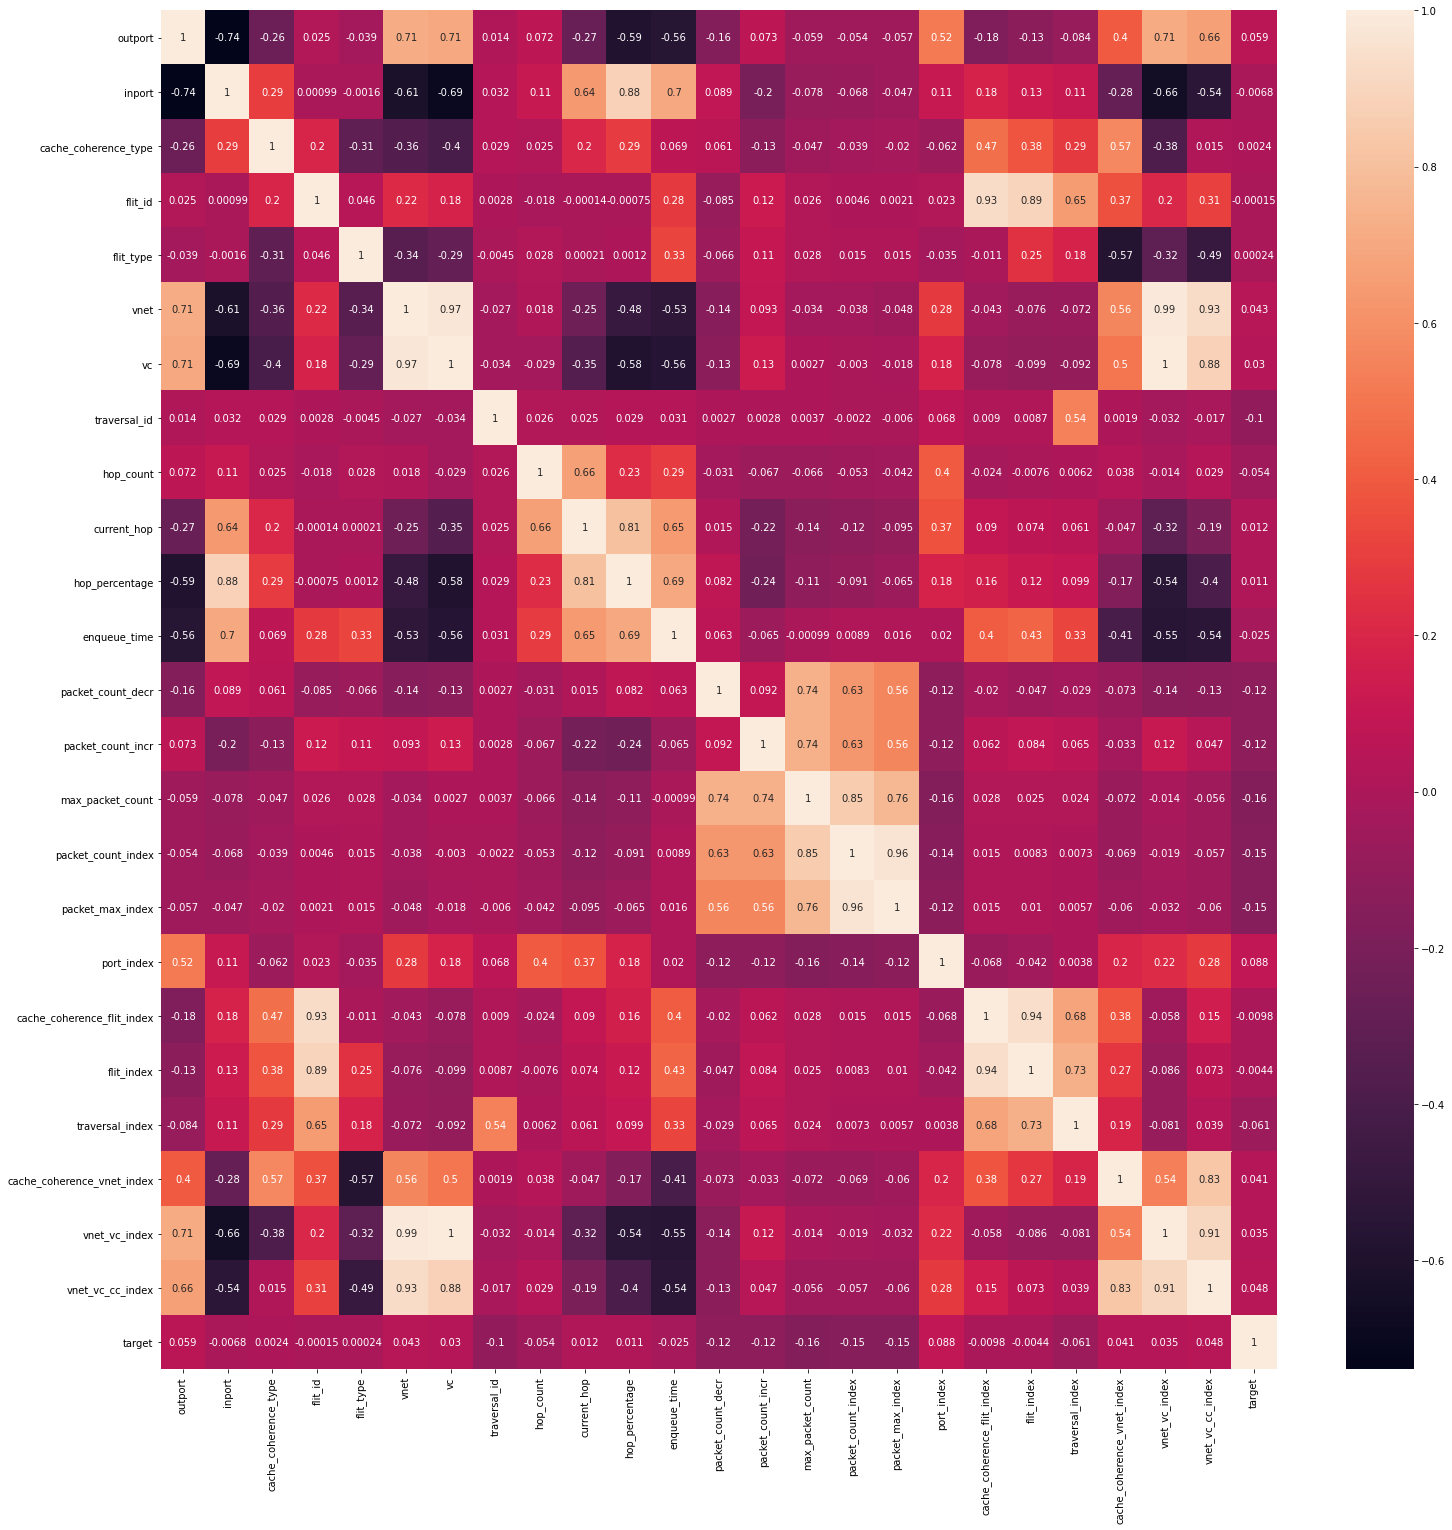

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,3,2,4,1,1,5,17,1,4,3,0.75,16,9,1,9,9,81,6,4,4,4,20,85,100
1,3,2,4,2,2,5,17,1,4,3,0.75,17,8,2,9,16,144,6,8,16,16,20,85,100
2,3,2,4,3,2,5,17,1,4,3,0.75,18,7,3,9,21,189,6,12,24,24,20,85,100
3,3,2,4,4,2,5,17,1,4,3,0.75,19,6,4,9,24,216,6,16,32,32,20,85,100
4,3,2,4,5,3,5,17,1,4,3,0.75,23,5,5,9,25,225,6,20,60,60,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631011,1,0,4,1,1,5,17,20048,2,0,0.00,5,5,8,12,40,480,0,4,4,80192,20,85,100
631012,1,0,4,2,2,5,17,20048,2,0,0.00,6,4,9,12,36,432,0,8,16,320768,20,85,100
631013,1,0,4,3,2,5,17,20048,2,0,0.00,7,3,10,12,30,360,0,12,24,481152,20,85,100
631014,1,0,4,4,2,5,17,20048,2,0,0.00,8,2,11,12,22,264,0,16,32,641536,20,85,100


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.000000,0.666667,0.5,0.00,0.000000,1.0,0.727273,0.000000,0.6,0.6,0.75,0.166667,0.216216,0.000000,0.216216,0.021108,0.005541,1.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.0
1,1.000000,0.666667,0.5,0.25,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.180556,0.189189,0.027027,0.216216,0.039578,0.009904,1.0,0.241379,0.139535,0.000006,0.944444,0.794521,1.0
2,1.000000,0.666667,0.5,0.50,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.194444,0.162162,0.054054,0.216216,0.052770,0.013020,1.0,0.379310,0.232558,0.000010,0.944444,0.794521,1.0
3,1.000000,0.666667,0.5,0.75,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.208333,0.135135,0.081081,0.216216,0.060686,0.014890,1.0,0.517241,0.325581,0.000014,0.944444,0.794521,1.0
4,1.000000,0.666667,0.5,1.00,0.666667,1.0,0.727273,0.000000,0.6,0.6,0.75,0.263889,0.108108,0.108108,0.216216,0.063325,0.015514,1.0,0.655172,0.651163,0.000027,0.944444,0.794521,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631011,0.333333,0.000000,0.5,0.00,0.000000,1.0,0.727273,0.872253,0.2,0.0,0.00,0.013889,0.108108,0.189189,0.297297,0.102902,0.033174,0.0,0.103448,0.000000,0.038770,0.944444,0.794521,1.0
631012,0.333333,0.000000,0.5,0.25,0.333333,1.0,0.727273,0.872253,0.2,0.0,0.00,0.027778,0.081081,0.216216,0.297297,0.092348,0.029850,0.0,0.241379,0.139535,0.155087,0.944444,0.794521,1.0
631013,0.333333,0.000000,0.5,0.50,0.333333,1.0,0.727273,0.872253,0.2,0.0,0.00,0.041667,0.054054,0.243243,0.297297,0.076517,0.024863,0.0,0.379310,0.232558,0.232631,0.944444,0.794521,1.0
631014,0.333333,0.000000,0.5,0.75,0.333333,1.0,0.727273,0.872253,0.2,0.0,0.00,0.055556,0.027027,0.270270,0.297297,0.055409,0.018215,0.0,0.517241,0.325581,0.310176,0.944444,0.794521,1.0


In [0]:
train_X[train_X.duplicated()].shape

(18297, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [0]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.333333,1.000000,0.000000,0.00,1.000000,0.0,0.000000,0.000371,0.8,0.8,0.80,0.225352,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
1,1.000000,0.666667,0.500000,0.00,0.000000,1.0,0.727273,0.000000,0.6,0.6,0.75,0.169014,0.333333,0.000000,0.333333,0.036066,0.013746,1.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.000000
2,1.000000,0.666667,0.500000,0.25,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.183099,0.303030,0.030303,0.333333,0.068852,0.025281,1.0,0.241379,0.139535,0.000016,0.944444,0.794521,1.000000
3,1.000000,0.666667,0.500000,0.50,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.197183,0.272727,0.060606,0.333333,0.095082,0.034509,1.0,0.379310,0.232558,0.000027,0.944444,0.794521,1.000000
4,1.000000,0.666667,0.500000,0.75,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.211268,0.242424,0.090909,0.333333,0.114754,0.041430,1.0,0.517241,0.325581,0.000038,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.000000,1.000000,0.166667,0.00,1.000000,0.0,0.090909,0.999753,0.2,0.4,1.00,0.507042,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.034483,0.046512,0.088862,0.166667,0.041096,0.098901
29996,0.666667,0.000000,0.333333,0.00,1.000000,0.0,0.272727,0.999753,0.2,0.0,0.00,0.000000,0.393939,0.000000,0.393939,0.042623,0.018745,0.0,0.068966,0.093023,0.133296,0.333333,0.123288,0.197802
29997,0.666667,0.000000,0.500000,0.00,0.000000,1.0,0.818182,0.999753,0.6,0.0,0.00,0.014085,0.363636,0.030303,0.393939,0.081967,0.034894,0.0,0.103448,0.000000,0.044428,0.944444,0.863014,1.000000
29998,0.666667,0.000000,0.500000,0.25,0.333333,1.0,0.818182,0.999753,0.6,0.0,0.00,0.028169,0.333333,0.060606,0.393939,0.114754,0.048351,0.0,0.241379,0.139535,0.177729,0.944444,0.863014,1.000000


In [0]:
test_X[test_X.duplicated()].shape

(0, 24)

In [0]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.333333,1.000000,0.000000,0.00,1.000000,0.0,0.000000,0.000376,0.8,0.8,0.80,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000017,0.000000,0.000000,0.000000
1,1.000000,0.666667,0.500000,0.00,0.000000,1.0,0.727273,0.000000,0.6,0.6,0.75,0.166667,0.366667,0.000000,0.366667,0.043137,0.018021,1.000000,0.103448,0.000000,0.000000,0.944444,0.794521,1.000000
2,0.333333,0.666667,0.000000,0.00,1.000000,0.0,0.000000,0.000501,0.2,0.2,0.50,0.069444,0.333333,0.033333,0.366667,0.082353,0.033144,0.333333,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000
3,1.000000,0.666667,0.500000,0.25,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.194444,0.300000,0.066667,0.366667,0.113725,0.045243,1.000000,0.241379,0.139535,0.000017,0.944444,0.794521,1.000000
4,1.000000,0.666667,0.500000,0.50,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.208333,0.266667,0.100000,0.366667,0.137255,0.054316,1.000000,0.379310,0.232558,0.000028,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.000000,0.666667,0.666667,1.00,0.666667,0.0,0.000000,0.999750,0.0,0.2,1.00,0.444444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.827586,0.825581,0.833855,0.666667,0.000000,0.395604
29996,0.000000,0.666667,0.000000,0.00,1.000000,0.0,0.090909,1.000000,0.0,0.2,1.00,0.444444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044478,0.000000,0.041096,0.000000
29997,0.666667,0.000000,0.833333,0.00,0.000000,0.0,0.090909,0.999750,0.4,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172414,0.023256,0.066703,0.833333,0.041096,0.494505
29998,0.666667,0.000000,0.833333,0.25,0.333333,0.0,0.090909,0.999750,0.4,0.0,0.00,0.097222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.379310,0.232558,0.266830,0.833333,0.041096,0.494505


In [0]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.333333,1.000000,0.000000,0.00,1.000000,0.0,0.000000,0.000367,0.8,0.8,0.80,0.246154,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
1,1.000000,0.666667,0.500000,0.00,0.000000,1.0,0.727273,0.000000,0.6,0.6,0.75,0.184615,0.333333,0.000000,0.333333,0.039216,0.015123,1.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.000000
2,1.000000,0.666667,0.500000,0.25,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.200000,0.300000,0.033333,0.333333,0.074510,0.027599,1.0,0.241379,0.139535,0.000016,0.944444,0.794521,1.000000
3,1.000000,0.666667,0.500000,0.50,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.215385,0.266667,0.066667,0.333333,0.101961,0.037303,1.0,0.379310,0.232558,0.000027,0.944444,0.794521,1.000000
4,1.000000,0.666667,0.500000,0.75,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.230769,0.233333,0.100000,0.333333,0.121569,0.044234,1.0,0.517241,0.325581,0.000038,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.000000,1.000000,0.166667,0.00,1.000000,0.0,0.090909,1.000000,0.2,0.4,1.00,0.553846,0.000000,0.033333,0.033333,0.003922,0.000378,0.0,0.034483,0.046512,0.088895,0.166667,0.041096,0.098901
29996,0.666667,0.000000,0.500000,0.00,0.000000,1.0,0.909091,1.000000,0.4,0.0,0.00,0.000000,0.166667,0.000000,0.166667,0.019608,0.004411,0.0,0.103448,0.000000,0.044445,0.944444,0.931507,1.000000
29997,0.666667,0.000000,0.500000,0.25,0.333333,1.0,0.909091,1.000000,0.4,0.0,0.00,0.015385,0.133333,0.033333,0.166667,0.035294,0.007435,0.0,0.241379,0.139535,0.177795,0.944444,0.931507,1.000000
29998,0.666667,0.000000,0.500000,0.50,0.333333,1.0,0.909091,1.000000,0.4,0.0,0.00,0.030769,0.100000,0.066667,0.166667,0.043137,0.008948,0.0,0.379310,0.232558,0.266695,0.944444,0.931507,1.000000


In [0]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.000000,0.666667,0.500000,0.00,0.000000,1.0,0.727273,0.000000,0.6,0.6,0.75,0.171429,0.15625,0.00000,0.15625,0.017361,0.003670,1.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.000000
1,1.000000,0.666667,0.500000,0.25,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.185714,0.12500,0.03125,0.15625,0.031250,0.006187,1.0,0.241379,0.139535,0.000018,0.944444,0.794521,1.000000
2,1.000000,0.666667,0.500000,0.50,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.200000,0.09375,0.06250,0.15625,0.038194,0.007445,1.0,0.379310,0.232558,0.000030,0.944444,0.794521,1.000000
3,1.000000,0.666667,0.500000,0.75,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.214286,0.06250,0.09375,0.15625,0.038194,0.007445,1.0,0.517241,0.325581,0.000042,0.944444,0.794521,1.000000
4,1.000000,0.666667,0.500000,1.00,0.666667,1.0,0.727273,0.000000,0.6,0.6,0.75,0.271429,0.03125,0.12500,0.15625,0.031250,0.006187,1.0,0.655172,0.651163,0.000084,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.000000,1.000000,0.833333,1.00,0.666667,0.0,0.000000,0.999866,0.2,0.4,1.00,0.514286,0.03125,0.12500,0.15625,0.031250,0.006187,0.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.494505
29996,0.000000,1.000000,0.166667,0.00,1.000000,0.0,0.090909,1.000000,0.2,0.4,1.00,0.514286,0.00000,0.15625,0.15625,0.017361,0.003670,0.0,0.034483,0.046512,0.088895,0.166667,0.041096,0.098901
29997,0.666667,0.000000,0.333333,0.00,1.000000,0.0,0.272727,1.000000,0.2,0.0,0.00,0.000000,0.15625,0.00000,0.15625,0.017361,0.003670,0.0,0.068966,0.093023,0.133346,0.333333,0.123288,0.197802
29998,0.666667,0.000000,0.500000,0.00,0.000000,1.0,1.000000,1.000000,0.6,0.0,0.00,0.014286,0.12500,0.03125,0.15625,0.031250,0.006187,0.0,0.103448,0.000000,0.044445,0.944444,1.000000,1.000000


In [0]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.333333,1.000000,0.000000,0.00,1.000000,0.0,0.000000,0.000367,0.8,0.8,0.80,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
1,1.000000,0.666667,0.500000,0.00,0.000000,1.0,0.727273,0.000000,0.6,0.6,0.75,0.166667,0.285714,0.000000,0.285714,0.029326,0.009747,1.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.000000
2,1.000000,0.666667,0.500000,0.25,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.180556,0.257143,0.028571,0.285714,0.055718,0.017789,1.0,0.241379,0.139535,0.000016,0.944444,0.794521,1.000000
3,1.000000,0.666667,0.500000,0.50,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.194444,0.228571,0.057143,0.285714,0.076246,0.024044,1.0,0.379310,0.232558,0.000027,0.944444,0.794521,1.000000
4,1.000000,0.666667,0.500000,0.75,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.208333,0.200000,0.085714,0.285714,0.090909,0.028511,1.0,0.517241,0.325581,0.000038,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.000000,1.000000,0.166667,0.00,1.000000,0.0,0.090909,0.999878,0.2,0.4,1.00,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.034483,0.046512,0.088895,0.166667,0.041096,0.098901
29996,1.000000,0.333333,0.666667,0.00,0.000000,0.0,0.000000,1.000000,0.6,0.6,0.75,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.137931,0.011628,0.055564,0.666667,0.000000,0.395604
29997,1.000000,0.333333,0.666667,0.25,0.333333,0.0,0.000000,1.000000,0.6,0.6,0.75,0.263889,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.310345,0.186047,0.222272,0.666667,0.000000,0.395604
29998,0.666667,0.000000,0.333333,0.00,1.000000,0.0,0.272727,0.999878,0.2,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.068966,0.093023,0.133345,0.333333,0.123288,0.197802


In [0]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.333333,1.000000,0.000000,0.00,1.000000,0.0,0.000000,0.000367,0.8,0.8,0.80,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
1,1.000000,0.666667,0.500000,0.00,0.000000,1.0,0.727273,0.000000,0.6,0.6,0.75,0.166667,0.285714,0.000000,0.285714,0.029326,0.009747,1.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.000000
2,1.000000,0.666667,0.500000,0.25,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.180556,0.257143,0.028571,0.285714,0.055718,0.017789,1.0,0.241379,0.139535,0.000016,0.944444,0.794521,1.000000
3,1.000000,0.666667,0.500000,0.50,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.194444,0.228571,0.057143,0.285714,0.076246,0.024044,1.0,0.379310,0.232558,0.000027,0.944444,0.794521,1.000000
4,1.000000,0.666667,0.500000,0.75,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.208333,0.200000,0.085714,0.285714,0.090909,0.028511,1.0,0.517241,0.325581,0.000038,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.000000,1.000000,0.833333,0.75,0.333333,0.0,0.000000,0.999878,0.2,0.4,1.00,0.402778,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.793103,0.511628,0.533331,0.833333,0.000000,0.494505
29996,0.000000,1.000000,0.833333,1.00,0.666667,0.0,0.000000,0.999878,0.2,0.4,1.00,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.494505
29997,0.000000,1.000000,0.166667,0.00,1.000000,0.0,0.090909,1.000000,0.2,0.4,1.00,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.034483,0.046512,0.088895,0.166667,0.041096,0.098901
29998,1.000000,0.000000,0.500000,0.00,0.000000,1.0,0.909091,1.000000,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.103448,0.000000,0.044445,0.944444,0.931507,1.000000


In [0]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.000000,0.666667,0.500000,0.00,0.000000,1.0,0.727273,0.000000,0.6,0.6,0.75,0.187500,0.137931,0.000000,0.137931,0.016736,0.003334,1.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.000000
1,1.000000,0.666667,0.500000,0.25,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.203125,0.103448,0.034483,0.137931,0.029289,0.005417,1.0,0.241379,0.139535,0.000019,0.944444,0.794521,1.000000
2,1.000000,0.666667,0.500000,0.50,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.218750,0.068966,0.068966,0.137931,0.033473,0.006112,1.0,0.379310,0.232558,0.000031,0.944444,0.794521,1.000000
3,1.000000,0.666667,0.500000,0.75,0.333333,1.0,0.727273,0.000000,0.6,0.6,0.75,0.234375,0.034483,0.103448,0.137931,0.029289,0.005417,1.0,0.517241,0.325581,0.000043,0.944444,0.794521,1.000000
4,1.000000,0.666667,0.500000,1.00,0.666667,1.0,0.727273,0.000000,0.6,0.6,0.75,0.296875,0.000000,0.137931,0.137931,0.016736,0.003334,1.0,0.655172,0.651163,0.000087,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.666667,0.000000,0.500000,0.25,0.333333,1.0,0.909091,0.999442,0.4,0.0,0.00,0.015625,0.137931,0.241379,0.379310,0.163180,0.066537,0.0,0.241379,0.139535,0.177673,0.944444,0.931507,1.000000
29996,0.666667,0.000000,0.500000,0.50,0.333333,1.0,0.909091,0.999442,0.4,0.0,0.00,0.031250,0.103448,0.275862,0.379310,0.146444,0.059869,0.0,0.379310,0.232558,0.266513,0.944444,0.931507,1.000000
29997,0.666667,0.000000,0.500000,0.75,0.333333,1.0,0.909091,0.999442,0.4,0.0,0.00,0.046875,0.068966,0.310345,0.379310,0.121339,0.049868,0.0,0.517241,0.325581,0.355353,0.944444,0.931507,1.000000
29998,0.666667,0.000000,0.333333,0.00,1.000000,0.0,0.090909,0.999442,0.2,0.0,0.00,0.062500,0.034483,0.344828,0.379310,0.087866,0.036533,0.0,0.068966,0.093023,0.133254,0.333333,0.041096,0.197802


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    320000
1    311016
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
14            max_packet_count  2100.256111
17                  port_index  1940.101768
15          packet_count_index  1387.053054
16            packet_max_index  1247.884712
13           packet_count_incr  1057.024183
12           packet_count_decr  1043.250963
7                 traversal_id   826.780108
0                      outport   595.080487
5                         vnet   537.930953
20             traversal_index   303.162517
8                    hop_count   284.514895
22               vnet_vc_index   277.596921
23            vnet_vc_cc_index   187.885475
6                           vc   179.021452
21  cache_coherence_vnet_index    68.494625
11                enqueue_time    43.960646
9                  current_hop    20.020249


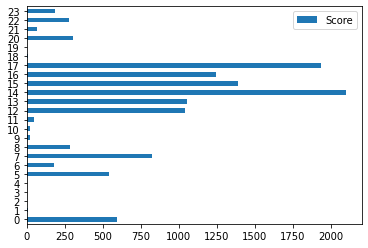

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 59.26186382257157
Test Prediction  59.151849386707234


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  76.39666666666668


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  68.24


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  74.50333333333333


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  70.73


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  73.68666666666667


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  73.58333333333333


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  42.089999999999996


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
15,packet_count_index,6.687112
6,vc,4.359062
9,current_hop,2.169714
5,vnet,2.134838
17,port_index,2.133051
23,vnet_vc_cc_index,1.266644
11,enqueue_time,0.651010
21,cache_coherence_vnet_index,0.553168
4,flit_type,0.246973
3,flit_id,0.206730


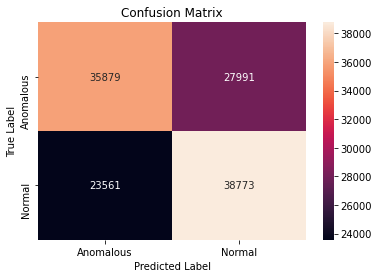

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58     63870
           1       0.58      0.62      0.60     62334

    accuracy                           0.59    126204
   macro avg       0.59      0.59      0.59    126204
weighted avg       0.59      0.59      0.59    126204



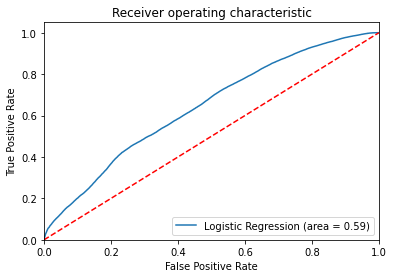

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

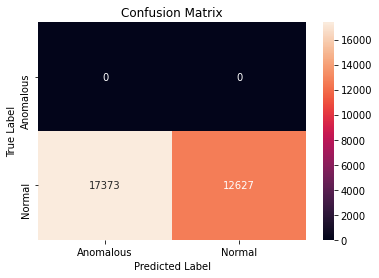

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.42      0.59     30000

    accuracy                           0.42     30000
   macro avg       0.50      0.21      0.30     30000
weighted avg       1.00      0.42      0.59     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 84.51720640555295
Test Prediction  76.79788279293842


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  57.410000000000004


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  56.2


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  56.42


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  54.986666666666665


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  53.403333333333336


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  63.50666666666667


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  51.976666666666674


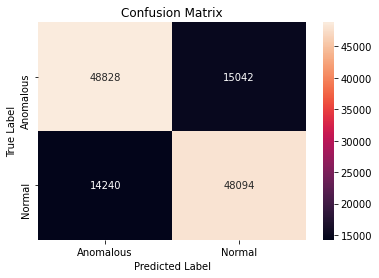

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77     63870
           1       0.76      0.77      0.77     62334

    accuracy                           0.77    126204
   macro avg       0.77      0.77      0.77    126204
weighted avg       0.77      0.77      0.77    126204



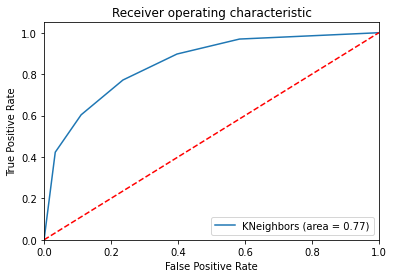

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

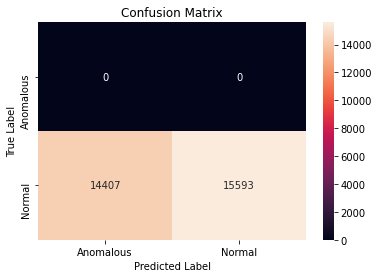

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.52      0.68     30000

    accuracy                           0.52     30000
   macro avg       0.50      0.26      0.34     30000
weighted avg       1.00      0.52      0.68     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 55.685681005998276
Test Prediction Score 55.881747012772976


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 44.56333333333333


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  47.50666666666667


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  47.22


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  50.78333333333334


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  42.32666666666667


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  41.760000000000005


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  69.65333333333334


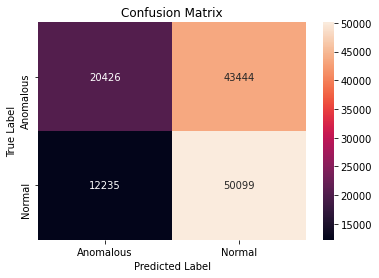

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.63      0.32      0.42     63870
           1       0.54      0.80      0.64     62334

    accuracy                           0.56    126204
   macro avg       0.58      0.56      0.53    126204
weighted avg       0.58      0.56      0.53    126204



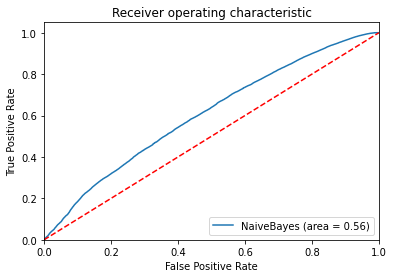

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 403849 samples, validate on 100963 samples
Epoch 1/10
403849/403849 [==============================] - 15s 37us/step - loss: 0.2370 - accuracy: 0.5871 - val_loss: 0.2349 - val_accuracy: 0.5938
Epoch 2/10
403849/403849 [==============================] - 15s 37us/step - loss: 0.2337 - accuracy: 0.5970 - val_loss: 0.2331 - val_accuracy: 0.5981
Epoch 3/10
403849/403849 [==============================] - 15s 37us/step - loss: 0.2322 - accuracy: 0.5986 - val_loss: 0.2327 - val_accuracy: 0.6005
Epoch 4/10
403849/403849 [==============================] - 15s 37us/step - loss: 0.2318 - accuracy: 0.5983 - val_loss: 0.2315 - val_accuracy: 0.5970
Epoch 5/10
403849/403849 [==============================] - 15s 38us/step - loss: 0.2316 - accuracy: 0.5991 - val_loss: 0.2315 - val_accuracy: 0.5986
Epoch 6/10
403849/403849 [==============================] - 15s 37us/step - loss: 0.2314 - accuracy: 0.5986 - val_loss: 0.2312 - val_accuracy: 0.5994
Epoch 7/10
403849/403849 [======================

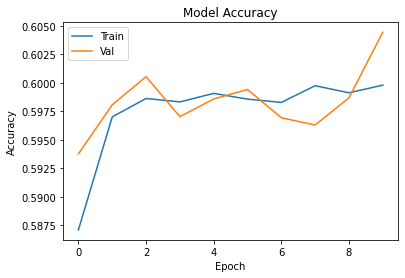

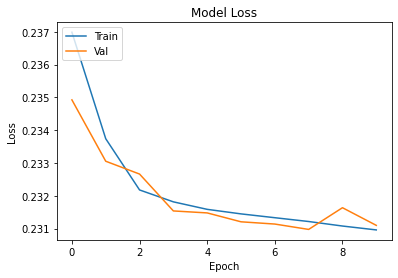

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 60.37%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.26%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 69.24%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.07%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 67.44%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 74.92%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 74.92%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 39.41%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 403849 samples, validate on 100963 samples
Epoch 1/30
403849/403849 [==============================] - 15s 37us/step - loss: 0.2499 - accuracy: 0.5122 - val_loss: 0.2496 - val_accuracy: 0.5224
Epoch 2/30
403849/403849 [==============================] - 15s 37us/step - loss: 0.2481 - accuracy: 0.5434 - val_loss: 0.2452 - val_accuracy: 0.5714
Epoch 3/30
403849/403849 [==============================] - 15s 36us/step - loss: 0.2403 - accuracy: 0.5890 - val_loss: 0.2377 - val_accuracy: 0.5969
Epoch 4/30
403849/403849 [==============================] - 15s 36us/step - loss: 0.2364 - accuracy: 0.6001 - val_loss: 0.2351 - val_accuracy: 0.6037
Epoch 5/30
403849/403849 [==============================] - 15s 37us/step - loss: 0.2340 - accuracy: 0.6056 - val_loss: 0.2331 - val_accuracy: 0.6066
Epoch 6/30
403849/403849 [==============================] - 15s 37us/step - loss: 0.2321 - accuracy: 0.6078 - val_loss: 0.2315 - val_accuracy: 0.6069
Epoch 7/30
403849/403849 [======================

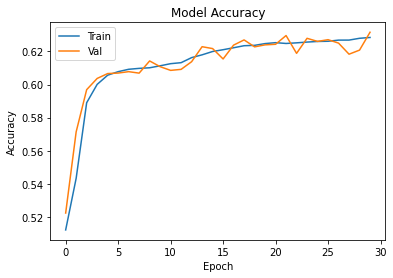

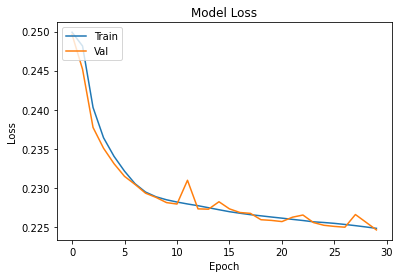

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 63.20%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.46%
accuracy: 70.30%
accuracy: 77.43%
accuracy: 65.87%
accuracy: 76.30%
accuracy: 76.27%
accuracy: 35.91%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 403849 samples, validate on 100963 samples
Epoch 1/30
403849/403849 [==============================] - 15s 37us/step - loss: 0.2498 - accuracy: 0.5195 - val_loss: 0.2496 - val_accuracy: 0.5296
Epoch 2/30
403849/403849 [==============================] - 15s 37us/step - loss: 0.2487 - accuracy: 0.5431 - val_loss: 0.2471 - val_accuracy: 0.5589
Epoch 3/30
403849/403849 [==============================] - 15s 37us/step - loss: 0.2414 - accuracy: 0.5847 - val_loss: 0.2368 - val_accuracy: 0.5997
Epoch 4/30
403849/403849 [==============================] - 15s 37us/step - loss: 0.2347 - accuracy: 0.6057 - val_loss: 0.2335 - val_accuracy: 0.6088
Epoch 5/30
403849/403849 [==============================] - 15s 37us/step - loss: 0.2320 - accuracy: 0.6120 - val_loss: 0.2336 - val_accuracy: 0.6163
Epoch 6/30
403849/403849 [==============================] - 15s 37us/step - loss: 0.2300 - accuracy: 0.6155 - val_loss: 0.2293 - val_accuracy: 0.6181
Epoch 7/30
403849/403849 [======================

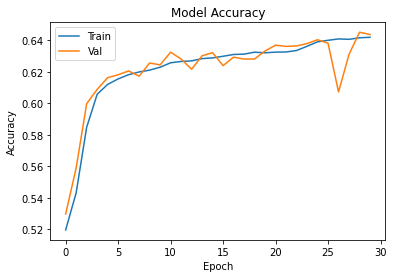

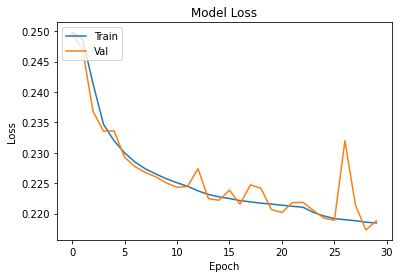

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 64.18%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.85%
accuracy: 77.65%
accuracy: 81.50%
accuracy: 68.76%
accuracy: 79.99%
accuracy: 80.66%
accuracy: 26.07%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 403849 samples, validate on 100963 samples
Epoch 1/100
403849/403849 [==============================] - 29s 71us/step - loss: 0.2209 - accuracy: 0.6331 - val_loss: 0.2198 - val_accuracy: 0.6394
Epoch 2/100
403849/403849 [==============================] - 28s 69us/step - loss: 0.2055 - accuracy: 0.6687 - val_loss: 0.2021 - val_accuracy: 0.6798
Epoch 3/100
403849/403849 [==============================] - 31s 78us/step - loss: 0.2001 - accuracy: 0.6788 - val_loss: 0.1917 - val_accuracy: 0.7008
Epoch 4/100
403849/403849 [==============================] - 28s 70us/step - loss: 0.1970 - accuracy: 0.6850 - val_loss: 0.1875 - val_accuracy: 0.7037
Epoch 5/100
403849/403849 [==============================] - 29s 71us/step - loss: 0.1951 - accuracy: 0.6888 - val_loss: 0.1842 - val_accuracy: 0.7094
Epoch 6/100
403849/403849 [==============================] - 29s 72us/step - loss: 0.1923 - accuracy: 0.6949 - val_loss: 0.1818 - val_accuracy: 0.7155
Epoch 7/100
403849/403849 [===============

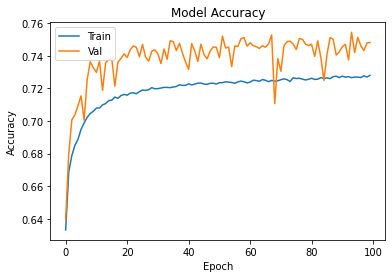

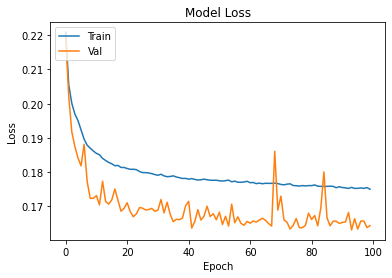

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 74.65%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 59.40%
accuracy: 56.52%
accuracy: 55.71%
accuracy: 56.79%
accuracy: 54.31%
accuracy: 65.54%
accuracy: 50.81%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 403849 samples, validate on 100963 samples
Epoch 1/50
403849/403849 [==============================] - 29s 73us/step - loss: 0.2189 - accuracy: 0.6365 - val_loss: 0.2032 - val_accuracy: 0.6729
Epoch 2/50
403849/403849 [==============================] - 29s 72us/step - loss: 0.2041 - accuracy: 0.6671 - val_loss: 0.1938 - val_accuracy: 0.6912
Epoch 3/50
403849/403849 [==============================] - 29s 71us/step - loss: 0.1995 - accuracy: 0.6769 - val_loss: 0.1930 - val_accuracy: 0.6928
Epoch 4/50
403849/403849 [==============================] - 29s 71us/step - loss: 0.1967 - accuracy: 0.6849 - val_loss: 0.1960 - val_accuracy: 0.6890
Epoch 5/50
403849/403849 [==============================] - 29s 71us/step - loss: 0.1937 - accuracy: 0.6900 - val_loss: 0.1851 - val_accuracy: 0.7084
Epoch 6/50
403849/403849 [==============================] - 29s 73us/step - loss: 0.1908 - accuracy: 0.6967 - val_loss: 0.1855 - val_accuracy: 0.7075
Epoch 7/50
403849/403849 [======================

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 74.90%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 55.78%
accuracy: 52.98%
accuracy: 51.16%
accuracy: 54.33%
accuracy: 50.40%
accuracy: 61.82%
accuracy: 52.92%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 95.40066400957188
Test Prediction Score 89.921080155938


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 58.42
Test Prediction Score 58.486666666666665
Test Prediction Score 58.42
Test Prediction Score 59.28666666666666
Test Prediction Score 54.56999999999999
Test Prediction Score 60.84
Test Prediction Score 47.20666666666667


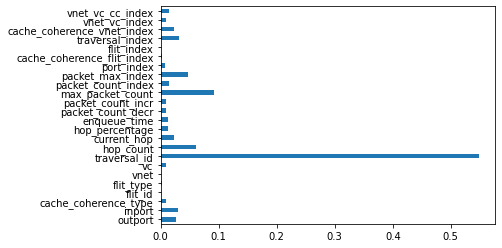

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

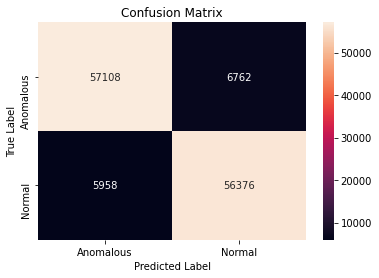

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     63870
           1       0.89      0.90      0.90     62334

    accuracy                           0.90    126204
   macro avg       0.90      0.90      0.90    126204
weighted avg       0.90      0.90      0.90    126204



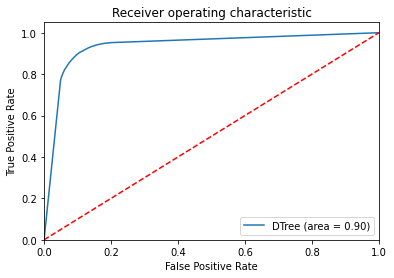

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 98.02282830043659
Test Prediction Score 90.84418877373142


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 59.08
Test Prediction Score 58.373333333333335
Test Prediction Score 58.54666666666667
Test Prediction Score 58.723333333333336
Test Prediction Score 55.276666666666664
Test Prediction Score 61.32333333333333
Test Prediction Score 47.82666666666667


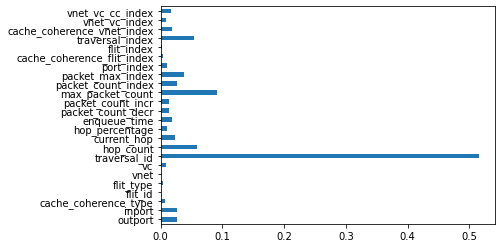

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

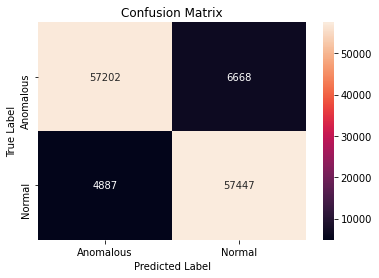

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     63870
           1       0.90      0.92      0.91     62334

    accuracy                           0.91    126204
   macro avg       0.91      0.91      0.91    126204
weighted avg       0.91      0.91      0.91    126204



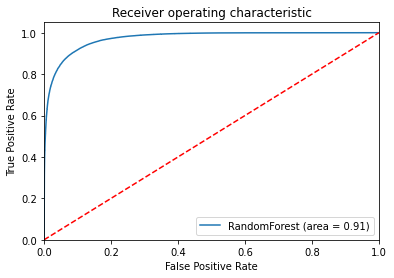

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [0]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.42216112136796
Test Prediction Score 94.26880289055815


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 58.99333333333333
Test Prediction Score 58.53333333333334
Test Prediction Score 58.21333333333333
Test Prediction Score 58.39666666666666
Test Prediction Score 54.690000000000005
Test Prediction Score 61.99
Test Prediction Score 47.25


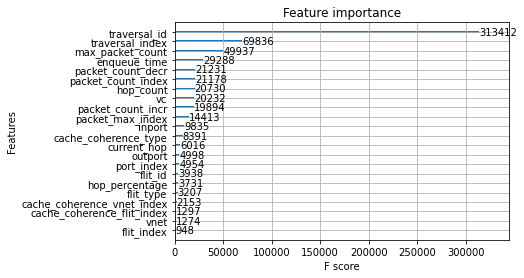

In [0]:
plot_importance(xgbc)
plt.show()

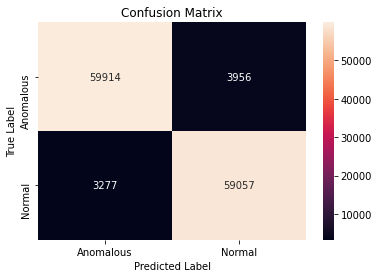

In [0]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     63870
           1       0.94      0.95      0.94     62334

    accuracy                           0.94    126204
   macro avg       0.94      0.94      0.94    126204
weighted avg       0.94      0.94      0.94    126204



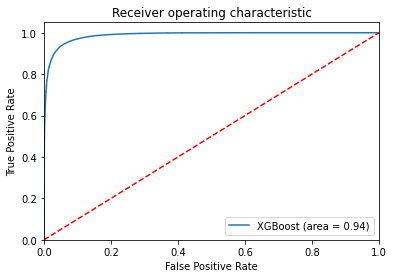

In [0]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [0]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 83.39302552237268
Test Prediction Score 82.54255015688885


In [0]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 58.08333333333333
Test Prediction Score 56.21000000000001
Test Prediction Score 55.11333333333334
Test Prediction Score 56.13666666666667
Test Prediction Score 52.656666666666666
Test Prediction Score 60.89333333333333
Test Prediction Score 50.18


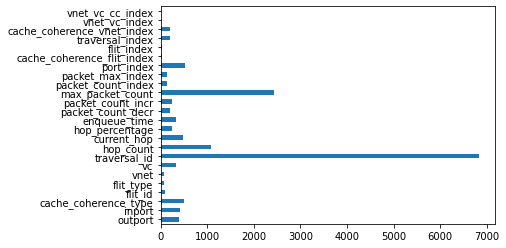

In [0]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

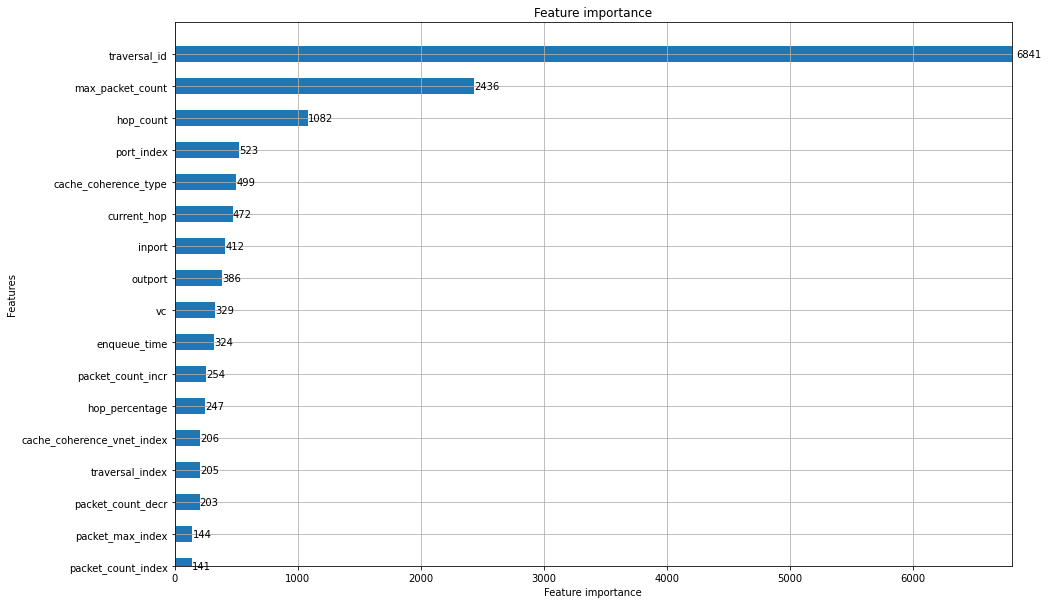

In [0]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [0]:
sorted(gbm.feature_importances_,reverse=True)

[6841,
 2436,
 1082,
 523,
 499,
 472,
 412,
 386,
 329,
 324,
 254,
 247,
 206,
 205,
 203,
 144,
 141,
 85,
 74,
 72,
 40,
 25,
 0,
 0]

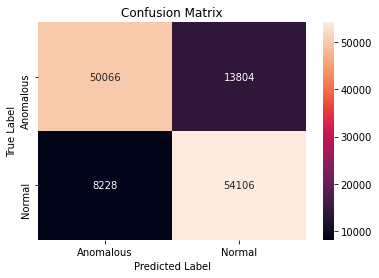

In [0]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82     63870
           1       0.80      0.87      0.83     62334

    accuracy                           0.83    126204
   macro avg       0.83      0.83      0.83    126204
weighted avg       0.83      0.83      0.83    126204



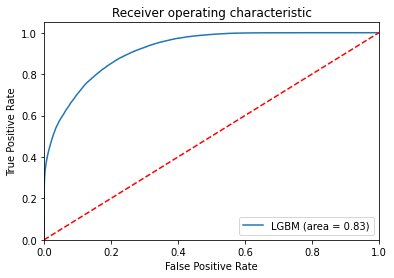

In [0]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()